## Sketch development of least-squares. 


Consider the situation where you have a pile of data $$\{ (x_i, y_i) : i = 1, 2, \cdots, k\}$$

for example, the $y_i$ terms could be measurements, and the $x_i$ could be the times at which the measurements are made. Say you strongly suspect (or *hope*) that the data sits on a curve of a certain type.  Like a line:
$$ y = a + bx $$
or a polynomial
$$ y = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n $$
or even a polynomial in trig functions
$$ y = a_0 + a_1 \cos(x) + a_2 \sin(x) + a_3 \cos(2x) + a_4 \sin(2x) + \cdots + a_{2n-1} \cos(nx) + a_{2n} \sin(nx)$$
The method of *least squares* is a technique perfectly designed for this problem. 

In the above set-up we replace the functions $1$, $x$, $x^2, \cdots$ or $1, \sin(x), \cos(x), \sin(2x), \cos(2x), \cdots$ by generic functions:

$$ f_1, f_2, f_3, \cdots, f_n $$
and our approximation to the measured data will be the function
$$ F(x) = a_1f_1(x) + a_2f_2(x) + \cdots + a_nf_n(x) $$
i.e. it is a linear combination of the generic functions we are considering. 

---

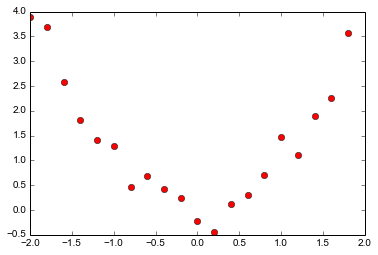

In [2]:
## TODO: generate example.  The xi's will be in "xlist" and the yi's will be "ylist".
##  We generate them pseudo-randomly around a parabola.  And then we use least-squares
##  to fit a parabola to the data. See the next window for the fitting. 

import random as rand
from matplotlib import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 

listlen = 20
xlist = [4*float(i)/float(listlen) - float(2.0) for i in range(listlen)]
ylist = [xlist[i]**2 + (rand.random()-float(0.5))/float(1.0) for i in range(listlen)]

ax = plt.gca() ## gca() means 'get current axis' -- this is an object one uses to append many things to plots. 
  ## gcf() is `get current figure' 
#ax.add_patch(plt.Circle((0,0), 1.0, color='black', alpha=0.8, lw=10, fill=False))
plt.plot(xlist, ylist, 'ro')
plt.show()

To turn this into a mathematical problem we define the *error* of the approximation at $x_i$ (or the $i$-th error term) 
$$E_i = |F(x_i) - y_i|$$
and in least squares we are trying to solve for $a_1, a_2, \cdots, a_n$ to minimize the *total error squared*
$$E^2 = E_1^2 + E_2^2 + \cdots + E_k^2.$$
The compelling part of least squares is that (subject to rather minimal conditions on the functions $f_1, \cdots, f_n$ there is a unique solution to the problem.  We sketch that below. 

----

Notice the total error squared is a differentiable function in the variables $a_1, \cdots, a_n$.
$$ E^2 = \sum_{j=1}^k (F(x_j)-y_j)^2 = \sum_{j=1}^k \left( \sum_{i=1}^n a_if_i(x_j)-y_j \right)^2$$

Calculus tells us the minimum of this function occurs when all the partial derivatives (with respect to $a_l$ $l=1,2, \cdots, n$) are zero. So we compute the partial derivative with respect to $a_l$:
$$\frac{\partial (E^2)}{\partial a_l} = 2 \sum_{j=1}^k \left( \sum_{i=1}^n a_if_i(x_j)-y_j \right) f_l(x_j) = 0$$
which we can write as a linear equation in the variables $a_1,\cdots, a_n$:
$$ \sum_{i=1}^n \left( \sum_{j=1}^k f_i(x_j)f_l(x_j) \right) a_i = \sum_{j=1}^k y_jf_l(x_j) \ \ \ \ \  l=1,2,\cdots, n$$
which can be written as a matrix equation
$$ \pmatrix{\sum_{j=1}^k f_1(x_j)f_1(x_j) & \sum_{j=1}^k f_2(x_j)f_1(x_j) & . & . & \sum_{j=1}^k f_n(x_j)f_1(x_j) \\ 
 \sum_{j=1}^k f_1(x_j)f_2(x_j) & \sum_{j=1}^k f_2(x_j)f_2(x_j) & . & . & \sum_{j=1}^k f_n(x_j)f_2(x_j) \\
 . & . & & & . \\
 . & . & & & . \\
 \sum_{j=1}^k f_1(x_j)f_n(x_j) & \sum_{j=1}^k f_2(x_j)f_n(x_j) & . & . & \sum_{j=1}^k f_n(x_j)f_n(x_j)} \pmatrix{a_1 \\ a_2 \\ . \\ . \\ a_n} = \pmatrix{\sum_{j=1}^k y_jf_1(x_j) \\ \sum_{j=1}^k y_jf_2(x_j) \\ . \\ . \\ \sum_{j=1}^k y_jf_n(x_j)} $$
Notice the matrix on the left consists of dot products.  If we take advantage of this we can re-write the above matrix equation in one that is a little more conceptually-pleasant to look at.  We define the matrix $A$ to consist of the grid of evalutions of the functions $f_i$ on the points $x_j$, i.e.
$$ A = \pmatrix{ f_1(x_1) & f_2(x_1) & . & f_n(x_1) \\ f_1(x_2) & f_2(x_2) & . & f_n(x_2) \\ . & . & & . \\ f_1(x_k) & f_2(x_k) & . & f_n(x_k) }$$
Then the above matrix equation is:
$$\vec{a} = (A^T A)^{-1} A^T \vec y$$
where $ \vec a = \pmatrix{ a_1 \\ a_2 \\ . \\ a_n}$ and $\vec y = \pmatrix{ y_1 \\ y_2 \\ . \\ y_n}$. 

---

The matrix $A^T A$ is invertible precisely when the column vectors of $A$ are linearly independent.  This gives us the observation:

**Theorem**: If one wishes to approximate the points $(x_i,y_i)$ with a linear combination $F = \sum_{i=1}^n a_i f_i$, then provided the *column vectors* of the matrix $A$ are linearly independent then there is a unique solution to the problem that minimizes the total error squared $E^2 = \sum_{j=1}^k (F(x_j)-y_j)^2$. In this situation the coefficient vector is given by the equation:
$$ \vec a = (A^TA)^{-1} A^T \vec y.$$

---

Of course, there may very well be solutions if the matrix $A^T A$ is not invertible, but unfortunately the inverse matrix would not exist, so the answer would have a less of a formulaic closed form.  There are two ways that the matrix can fail to be invertible.  

* The functions $f_1, \cdots, f_n$ fail to be linearly independent. 
* One either does not have enough sample points $x_i$, or the sample points are chosen in *bad* locations, resulting in the matrix $A$ not having full rank.  Notice that if $k < n$ the matrix $A$ is always degenerate.  Provided the functions $f_1, \cdots, f_n$ are linearly independent, and $k \geq n$, *usually* the matrix $A$ has rull rank.  In order for the least-squares approximation to be *interesting* one usually needs $k$ to be significantly larger than $n$.  For example, if one is fitting a line to data, then $n=2$, $f_1 = 1$, $f_2 = x$.  If $k=2$ the resulting approximation is the unique line through two points!  Usually this would not be considered significant. 

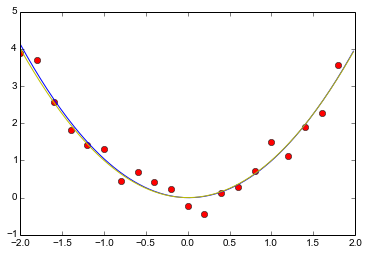

In [3]:
## Let's now interpolate a parabola through the data above.   With the above set-up we would anticipate
## least squares will give us something close to y(x) = x^2 in return. 

from numpy import matrix
from numpy import linalg

## Let's compute the matrix A. A[i][j] is f_j evaluated at x_i. 

A = matrix([[xlist[i]**j for i in range(len(xlist))] for j in range(3)]).T

#print A
#print linalg.det(A.T * A)

cvec = ((A.T*A).I)*(A.T)*(matrix(ylist).T)

ax = plt.gca() ## gca() means 'get current axis' -- this is an object one uses to append many things to plots. 
  ## gcf() is `get current figure' 

plt.plot(xlist, ylist, 'ro')
## let's append the best fit to the plot.
FAC = 10 ## amount to refine the plot
refx = [4*float(i)/float(FAC*listlen) - float(2.0) for i in range(FAC*listlen)]
refy = [cvec[0,0] + cvec[1,0]*refx[i] + cvec[2,0]*(refx[i]**2) for i in range(FAC*listlen)]
plt.plot(refx, refy, 'b-')

## Let's also add the graph of y=x^2.
refy = [refx[i]**2 for i in range(FAC*listlen)]
plt.plot(refx, refy, 'y-')

plt.show()



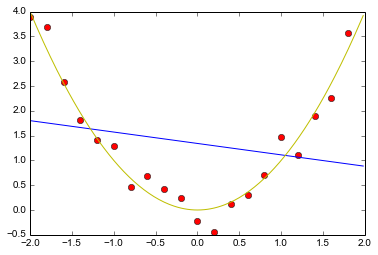

In [4]:
plt.clf()

## Let's check to see what happens if we attempt to fit a line to the data. 

A = matrix([[xlist[i]**j for i in range(len(xlist))] for j in range(2)]).T

cvec = ((A.T*A).I)*(A.T)*(matrix(ylist).T)

ax = plt.gca() ## gca() means 'get current axis' -- this is an object one uses to append many things to plots. 
  ## gcf() is `get current figure' 

plt.plot(xlist, ylist, 'ro')
## let's append the best fit to the plot.
FAC = 10 ## amount to refine the plot
refx = [4*float(i)/float(FAC*listlen) - float(2.0) for i in range(FAC*listlen)]
refy = [cvec[0,0] + cvec[1,0]*refx[i] for i in range(FAC*listlen)]
plt.plot(refx, refy, 'b-')

## Let's also add the graph of y=x^2.
refy = [refx[i]**2 for i in range(FAC*listlen)]
plt.plot(refx, refy, 'y-')

plt.show()


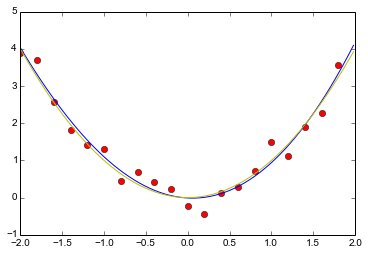

Cubic coefficients:  [[-0.01082229]
 [-0.11747863]
 [ 1.02921345]
 [ 0.03865797]]


In [5]:
## And let's interpolate a cubic, just for fun. 

plt.clf()

## Let's check to see what happens if we attempt to fit a line to the data. 

A = matrix([[xlist[i]**j for i in range(len(xlist))] for j in range(4)]).T

cvec = ((A.T*A).I)*(A.T)*(matrix(ylist).T)

ax = plt.gca() ## gca() means 'get current axis' -- this is an object one uses to append many things to plots. 
  ## gcf() is `get current figure' 

plt.plot(xlist, ylist, 'ro')
## let's append the best fit to the plot.
FAC = 10 ## amount to refine the plot
refx = [4*float(i)/float(FAC*listlen) - float(2.0) for i in range(FAC*listlen)]
refy = [cvec[0,0] + cvec[1,0]*refx[i] + cvec[2,0]*refx[i]**2 + cvec[3,0]*refx[i]**3 for i in range(FAC*listlen)]
plt.plot(refx, refy, 'b-')

## Let's also add the graph of y=x^2.
refy = [refx[i]**2 for i in range(FAC*listlen)]
plt.plot(refx, refy, 'y-')

plt.show()

print "Cubic coefficients: ", cvec

In [57]:
## So the cubic is quite close to the quadratic approximation. 


## Moments of a distribution

The $n$-th moment of a real-valued function $f : \mathbb R \to \mathbb R$ centred at $c \in \mathbb R$ is defined as:

$$ \mu_{n,c} f = \int_{-\infty}^\infty (x-c)^nf(x)dx $$

* Typically $\mu_{0,c} f$ is called the *mass* or *total value* of $f$. It is independent of $n$.

* Assuming $\mu_{0,c} f = 1$, $\mu_{1,c} f$ is called the *centre of mass* or *mean* of $f$. Such an $f$ is called a probability function. 

* $\mu_{n,0} f$ are called the *raw* or *crude* moments of $f$.  

* Moments about the mean are called *central moments* of $f$. 

* For probability distributions, notice that $\mu_{1,c} f = \mu_{1,0} f - c$. 

* Typically the $2^{nd}$ moment is called the *variance*. 

* The $3^{rd}$ moment is called the *skewness*. 

* The $4^{th}$ moment is called the *kurtosis*.

Let us compute these notions for a few point clouds. 


In [15]:
## moments of xlist:

print "0th moment of xlist: ", len(xlist)
print "1st moment of xlist: ", sum(xlist)/float(len(xlist)) ## we divide by len(xlist) for a probability distribution
print "2nd moment of xlist: ", sum(x**2 for x in xlist)/float(len(xlist)) 
print "3rd moment of xlist: ", sum(x**3 for x in xlist)/float(len(xlist))
print "4th moment of xlist: ", sum(x**4 for x in xlist)/float(len(xlist))
centroid = sum(xlist)/float(len(xlist))
print "2nd central moment of xlist: ", sum((x-centroid)**2 for x in xlist)/float(len(xlist)) 
print "3rd central moment of xlist: ", sum((x-centroid)**3 for x in xlist)/float(len(xlist))
print "4th central moment of xlist: ", sum((x-centroid)**4 for x in xlist)/float(len(xlist))

0th moment of xlist:  20
1st moment of xlist:  -0.1
2nd moment of xlist:  1.34
3rd moment of xlist:  -0.4
4th moment of xlist:  3.25328
2nd central moment of xlist:  1.33
3rd central moment of xlist:  1.7763568394e-16
4th central moment of xlist:  3.17338


In [17]:
## moments of ylist
print "0th moment of ylist: ", len(ylist)
print "1st moment of ylist: ", sum(ylist)/float(len(ylist)) ## we divide by len(xlist) for a probability distribution
print "2nd moment of ylist: ", sum(y**2 for y in ylist)/float(len(ylist)) 
print "3rd moment of ylist: ", sum(y**3 for y in ylist)/float(len(ylist))
print "4th moment of ylist: ", sum(y**4 for y in ylist)/float(len(ylist))
centroid = sum(ylist)/float(len(ylist))
print "2nd central moment of ylist: ", sum((y-centroid)**2 for y in ylist)/float(len(ylist)) 
print "3rd central moment of ylist: ", sum((y-centroid)**3 for y in ylist)/float(len(ylist))
print "4th central moment of ylist: ", sum((y-centroid)**4 for y in ylist)/float(len(ylist))

0th moment of ylist:  20
1st moment of ylist:  1.36460840867
2nd moment of ylist:  3.45553122361
3rd moment of ylist:  10.3516482864
4th moment of ylist:  34.3546814773
2nd central moment of ylist:  1.59337511461
3rd central moment of ylist:  1.28753516316
4th central moment of ylist:  6.05645164107


In [28]:
## Let's compute the moments of y-list, centred at the corresponding point of the fitted parabola. 

## re-compute the parabola's coefficients
A = matrix([[xlist[i]**j for i in range(len(xlist))] for j in range(3)]).T
cvec = ((A.T*A).I)*(A.T)*(matrix(ylist).T)

## convienient way to call the parabola's values. 
def parab(x):
    return cvec[0,0] + cvec[1,0]*x + cvec[2,0]*(x**2)

print "1st (fitted) moment of ylist: ", sum( ylist[i] - parab(xlist[i]) for i in range(len(ylist)))/float(len(ylist))
print "2nd (fitted) moment of ylist: ", sum( (ylist[i] - parab(xlist[i]))**2 for i in range(len(ylist)))/float(len(ylist)) 
print "3nd (fitted) moment of ylist: ", sum( (ylist[i] - parab(xlist[i]))**3 for i in range(len(ylist)))/float(len(ylist)) 
print "4th (fitted) moment of ylist: ", sum( (ylist[i] - parab(xlist[i]))**4 for i in range(len(ylist)))/float(len(ylist)) 



1st (fitted) moment of ylist:  5.27355936697e-17
2nd (fitted) moment of ylist:  0.0686661631307
3nd (fitted) moment of ylist:  0.00307118646377
4th (fitted) moment of ylist:  0.00912754864154
